## Setting Up

In [12]:
# Setting Up
words = open('./names.txt', 'r').read().split()


In [ ]:
words[:10]


In [16]:
sorted(bigrams.items(), key=lambda kv: -kv[1])[:10]


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

## Storing the data in a Tensor

To allow learning on the data easily we can represent this data using a `28x28` Tensor. Each of the `28` rows(`i`) will represent one of the `28` characters in the alphabet:
`a, b, c, ..., z, <S>, <E>`.
Meanwhile each column(`j`) also represents a character from the alphabet and the number in position `(i, j)` represents how often the `j`th character has occured after the `i`th character in the data given.

In [30]:
bigrams = {}  # Dictionary to count bigrams

for word in words:
    chars = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1


In [31]:
import torch


In [32]:
alphabet = list(".abcdefghijklmnopqrstuvwxyz")
char_to_index = {char: index for index, char in enumerate(alphabet)}
index_to_char = {index: char for index, char in enumerate(alphabet)}

# char_to_index, index_to_char


In [33]:

counts = torch.zeros((27, 27), dtype=torch.int32)

for ((char_1, char_2), count) in bigrams.items():
    row = char_to_index[char_1]
    column = char_to_index[char_2]

    counts[row, column] += count


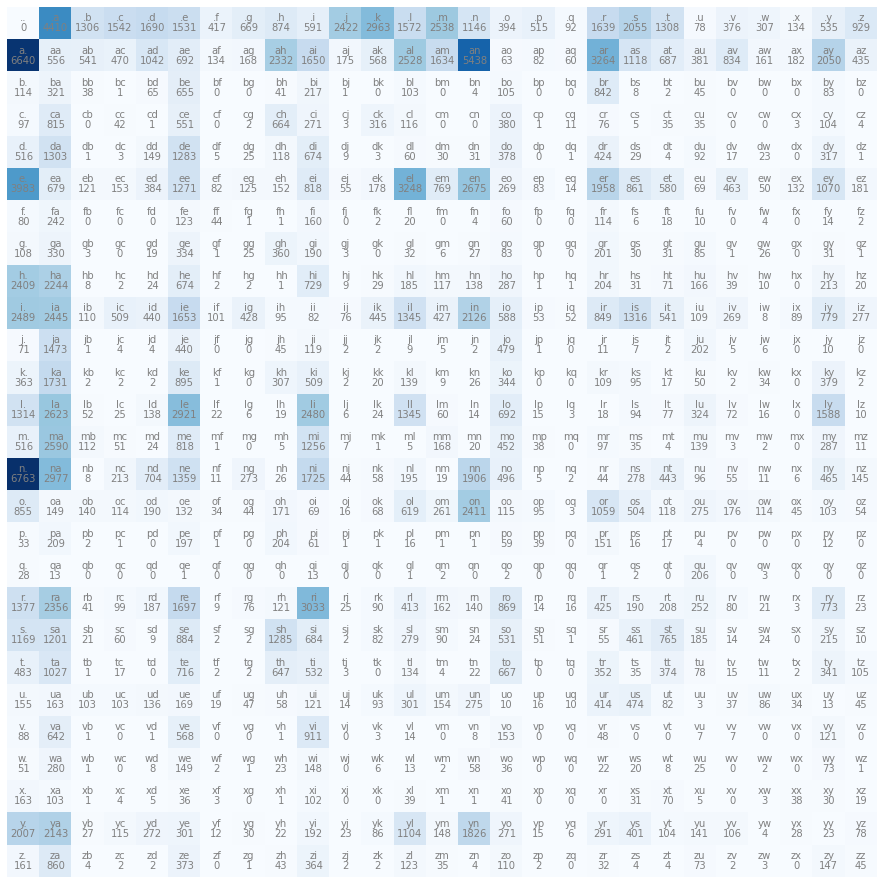

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(counts, cmap='Blues')

for row in range(27):
    for column in range(27):
        chars = index_to_char[row] + index_to_char[column]
        plt.text(column, row, chars, ha="center", va="bottom", color="gray")
        plt.text(column, row, counts[row, column].item(
        ), ha="center", va="top", color="gray")

plt.axis('off')


In [38]:
counts[0]


tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [39]:
# Convert this into a probability distribution, so we can sample it
p = counts[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [44]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum() # Normalize it
p

tensor([0.6064, 0.3033, 0.0903])